# Exploratory Data Analysis

In [1]:
# Importing libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # convert skill_list from str to list

### Filter for UK Data Analyst roles

In [2]:
# only get data analyst jobs in the UK
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

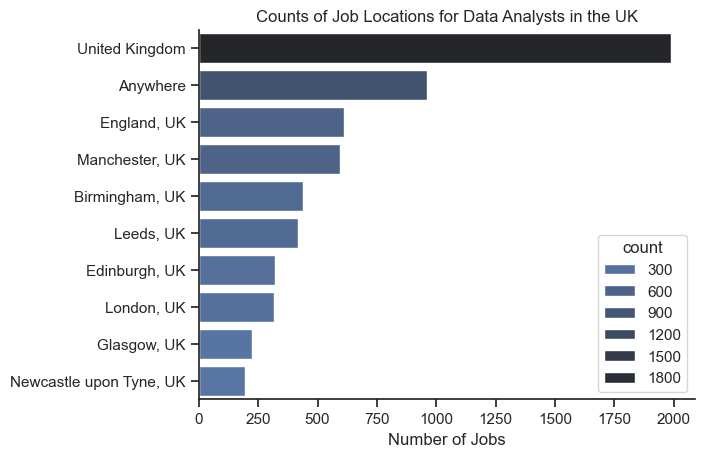

In [11]:
df_plot = df_da_uk['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Create pie charts to show the percentage of WFH, and if a degree is required

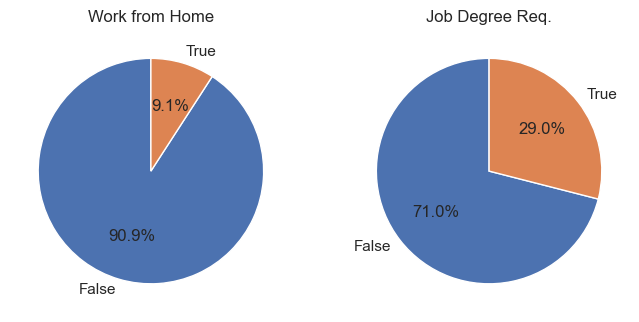

In [15]:
# create a dictionary of columns with the value being the header
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    #'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((8, 5))

for i, (column, title) in enumerate(dict_column.items()): # (column, title) is a tuple of the key: value found in the dict
# note: running enumerate on a list provides the index
    ax[i].pie(df_da_uk[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])    # Labels must be in correct order
    ax[i].set_title(title)

plt.show()

### Create a Bar chart showing the number of Job Postings for Data Analysts by Company

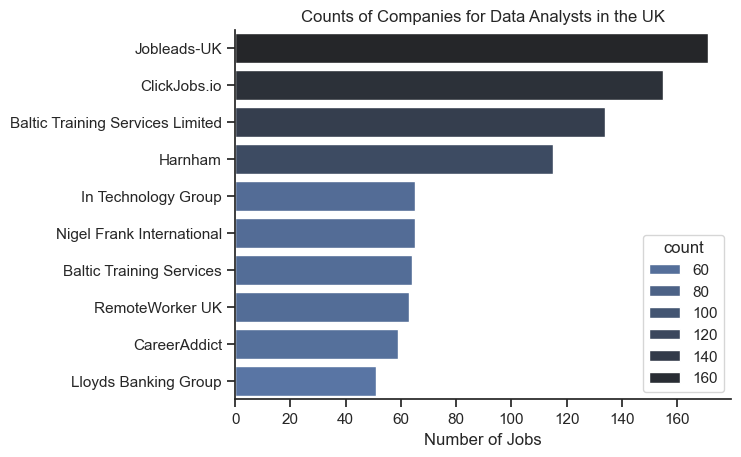

In [16]:
df_plot = df_da_uk['company_name'].value_counts().head(10).to_frame() # put the top 10 companies into a data frame

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine() # remove border from plot
plt.title('Counts of Companies for Data Analysts in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()